EPOCHS:0
loss_val:0.5639025993020541
loss_train:0.5662702835444647
EPOCHS:1
loss_val:0.44388590508556713
loss_train:0.445935242442773
EPOCHS:2
loss_val:0.36247585593997567
loss_train:0.3645213160982497
EPOCHS:3
loss_val:0.3080131376620213
loss_train:0.310423828598689
EPOCHS:4
loss_val:0.27290029299365426
loss_train:0.2758038058203761
EPOCHS:5
loss_val:0.2526858906264662
loss_train:0.2559518120714671
EPOCHS:6
loss_val:0.2411291510180413
loss_train:0.2447534074087342
EPOCHS:7
loss_val:0.23596089330313383
loss_train:0.23969305726482837
EPOCHS:8
loss_val:0.23330745924725318
loss_train:0.23707039757504617
EPOCHS:9
loss_val:0.23230109296477514
loss_train:0.23606597938717722
EPOCHS:10
loss_val:0.2321579727766499
loss_train:0.23589950064600343
EPOCHS:11
loss_val:0.23179576055978224
loss_train:0.23555997687152264
EPOCHS:12
loss_val:0.23175876630953737
loss_train:0.23554217963430552
EPOCHS:13
loss_val:0.23188871184209398
loss_train:0.235699188494868
EPOCHS:14
loss_val:0.23190725486639815
loss_tr

EPOCHS:118
loss_val:0.23205186269162076
loss_train:0.23588345984769168
EPOCHS:119
loss_val:0.23231642015241669
loss_train:0.23614761157506486
EPOCHS:120
loss_val:0.23226895189413146
loss_train:0.2360890739997196
EPOCHS:121
loss_val:0.23227628911336434
loss_train:0.23610885431108336
EPOCHS:122
loss_val:0.23239234297756234
loss_train:0.23622169746247942
EPOCHS:123
loss_val:0.23248514424873434
loss_train:0.23631298012596388
EPOCHS:124
loss_val:0.2322299345982623
loss_train:0.23606844020995119
EPOCHS:125
loss_val:0.23215063559139792
loss_train:0.23600204986315376
EPOCHS:126
loss_val:0.23236530274045225
loss_train:0.23619113919026521
EPOCHS:127
loss_val:0.23218595332560332
loss_train:0.23604412076780176
EPOCHS:128
loss_val:0.232380567592832
loss_train:0.23620823939524785
EPOCHS:129
loss_val:0.23220498470089282
loss_train:0.23606201738591753
EPOCHS:130
loss_val:0.23235996550930116
loss_train:0.23620519211833324
EPOCHS:131
loss_val:0.23267109111856926
loss_train:0.23648703521795408
EPOCHS:132

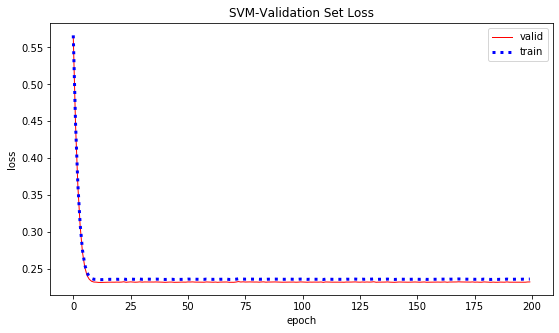

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# load dataset
X_train, Y_train = sklearn.datasets.load_svmlight_file('dataset/a9a', n_features=123)
X_val, Y_val = sklearn.datasets.load_svmlight_file('dataset/a9a.t', n_features=123)
# print(X_train.shape)
# print(Y_train.shape)

# make the row vectors into column vectors
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_val = Y_val.reshape(Y_val.shape[0], 1)


# Hinge Loss Function
def HingeLoss(y_, y, C):
    loss = np.maximum(0, (1-y*y_))
    return C*loss.sum() / y.shape[0]

# initialize
loss_val = []
loss_train = []

def plot():
    plt.figure(figsize=[9, 5])
    plt.title('SVM-Validation Set Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(loss_val, color='red', linewidth=1, label='valid')
    plt.plot(loss_train, color='blue', linewidth=3, label='train', linestyle=':')
    plt.legend()
    plt.savefig('Validation-Set-Loss')
    plt.show()

# make iterations(using mini-batch gradient descent)
def svm(epochs, lr, batch_size, c):
    # initialize parameter w
    w = np.random.normal(size=(123, 1))
    for epoch in range(epochs):
        for i in range(X_train.shape[0] // batch_size):
            # randomly pick samples
            batch_index = np.random.choice(np.arange(X_train.shape[0]), batch_size)
            X = X_train[batch_index]
            Y = Y_train[batch_index]
            # print(X.shape)  //(32,123)
            # print(Y.shape)   //(32,1)

            # calculating gradient step
            x = (1 - Y*X.dot(w) < 0)
            y = Y.copy()
            y[x] = 0

            # gradient, update w
            G = w + (-1)*(X.transpose().dot(y)*c)
            # print(G.shape)
            D = -G
            w = w + lr * D

        # evaluate the loss on the validation set
        output_val = X_val.dot(w)
        output_train = X_train.dot(w)
        loss_val.append(HingeLoss(output_val, Y_val, 0.5))
        loss_train.append(HingeLoss(output_train, Y_train, 0.5))

        # mark the positive class and the negative class(SVM)
        output_val[output_val > 0] = 1
        output_val[output_val <= 0] = -1

        output_train[output_train > 0] = 1
        output_train[output_train <= 0] = -1

        print('EPOCHS:{}'.format(epoch))
        print('loss_val:{}'.format(loss_val[-1]))
        print('loss_train:{}'.format(loss_train[-1]))
        
    plot()
        
svm(200, 0.0003, 32, 0.05)